**Followings are functions from previous project:**

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as bs

a = 7**5
b = 0
m = 2**31-1

#This function generates uniform distribution
def f_unif(n,x_0):
    U = [None] * (n+1)
    U[0] = x_0
    for i in range(1,(n+1)):
        U[i] = np.mod(a*U[i-1]+b,m)
    del U[0]
    U = [x/m for x in U]
    return U

#This function generates normal distribution
def f_norm(n,U):
    Z_1 = [None]*n
    Z_2 = [None]*n
    for i in range(n):
        Z_1[i] = np.sqrt(-2*np.log(U[2*i]))*np.cos(2*math.pi*U[2*i+1])
        Z_2[i] = np.sqrt(-2*np.log(U[2*i]))*np.sin(2*math.pi*U[2*i+1])
        i = i + 1
    return Z_1+Z_2

#This function generates a brownian motion
def f_w(T,Z):
    W = [np.sqrt(T)*x for x in Z]
    return W

# Problem 1

The following functions are used for computing probabilities:

In [65]:
n = 1000
x = 500
Y0 = 3/4
X0 = 1

def f_YP(n,x,dt,Y0,k):
    count = 0
    All = [None]*100
    for j in range(100):
        U = f_unif(n,j+10)
        Z = f_norm(x,U)
        W = f_w(dt,Z)
        Y = [None]*(n+1)
        Y[0] = Y0
        t = dt
        for i in range(n):
            Y[i+1] = Y[i] + (2/(1+t)*Y[i] + (1+t**3)/3)*dt+(1+t**3)/3*(W[i])
            t = t + dt
        if Y[n] > k:
            count = count + 1
        All[j] = Y[n]
    out = [All,count]
    return out

def f_XV(n,x,dt,X0,k):
    All = [None]*100
    for j in range(100):
        U = f_unif(n,j+100)
        Z = f_norm(x,U)
        W = f_w(dt,Z)
        X = [None]*(n+1)
        X[0] = X0
        for i in range(n):
            X[i+1] = X[i] + (1/5 - 1/2*X[i])*dt+2/3*(W[i])
        All[j] = np.sign(X[n])*np.absolute(X[n])**k
    return All

**Each of the simulatoins runs $10^5$ calculations, thus, it takes a littile bit time to run each simulation** <br>

In [70]:
dt2 = 2/n
P_Y2 = f_YP(n,x,dt2,Y0,5)[1]/100
print(P_Y2)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in int_scalars
  from ipykernel import kernelapp as app


0.98


$P(Y_2 > 5) \approx 0.98$

In [67]:
dt3 = 3/n
E_Y3 = np.mean(f_YP(n,x,dt3,Y0,10000)[0])
print(E_Y3)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in int_scalars
  from ipykernel import kernelapp as app


26.38584746299788


$E(Y_3) \approx 26.38$

In [68]:
E_X2_13 = np.mean(f_XV(n,x,dt2,X0,1/3))
print(E_X2_13)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in int_scalars
  from ipykernel import kernelapp as app


0.6555430986101816


$E(X_2^{\frac{1}{3}}) \approx 0.65$

In [69]:
X2 = f_XV(n,x,dt2,X0,1)
Y2 = f_YP(n,x,dt2,Y0,10000)[0]
X2g1 = [None]*100
for i in range(100):
    if X2[i] > 1:
        X2g1[i] = 1
    else:
        X2g1[i] = 0

E = np.mean([a*b*c for a,b,c in zip(X2,Y2,X2g1)])
print(E)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in int_scalars
  from ipykernel import kernelapp as app


3.9432667688269656


$E(X_2Y_21(X_2>1)) \approx 3.94$

# Problem 2

In [9]:
#2----------------------------------------------------
def f_XV2(n,x,dt,X0,k):
    All = [None]*100
    for j in range(100):
        U1 = f_unif(n,j+1000)
        U2 = f_unif(n,j+2000)
        Z1 = f_norm(x,U1)
        Z2 = f_norm(x,U2)
        W1 = f_w(dt,Z1)
        W2 = f_w(dt,Z2)
        X = [None]*(n+1)
        X[0] = X0
        for i in range(n):
            X[i+1] = X[i] + 1/4*X[i]*dt + 1/3*X[i]*W1[i] - 3/4*X[i]*W2[i]
        All[j] = np.sign(1+X[n])*np.absolute(1+X[n])**k
    return All

EX3_2 = np.mean(f_XV2(n,x,dt3,X0,1/3))
print(EX3_2)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


1.3574080066094518


$E(1+X_3)^{\frac{1}{3}} \approx 1.36$

In [11]:
U1 = f_unif(n,1)
U2 = f_unif(n,2)
Z1 = f_norm(x,U1)
Z2 = f_norm(x,U2)
W1 = f_w(3,Z1)
W2 = f_w(3,Z2)
Y3 = [np.exp(-0.08*3+1/3*a+3/4*b) for a,b in zip(W1,W2)]
EY3_2 = [(1+y)**(1/3) for y in Y3]
EY3_2 = np.mean(EY3_2)
print(EY3_2)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


1.3421793474167587


$E(1+Y_3)^{\frac{1}{3}} \approx 1.34$

# Problem 3
**(a) pricing function for European Option**

In [14]:
#3-------------------------------------------
#a
def Euro_Call(S0,T,X,r,sigma):
    n = 1000
    u = f_unif(n,1234)
    z1 = f_norm(500,u)
    z2 = [-x for x in z1]
    w1 = f_w(T,z1)
    w2 = f_w(T,z2)
    x1 = S0*np.exp(sigma*np.array(w1)+(r-(sigma**2/2))*T)
    x2 = S0*np.exp(sigma*np.array(w2)+(r-(sigma**2/2))*T)
    ST_red1 = [None]*n
    ST_red2 = [None]*n
    for i in range(n):
        if (x1[i]-X) > 0:
            ST_red1[i] = x1[i]-X
        else:
            ST_red1[i] = 0
        if (x2[i]-X) > 0:
            ST_red2[i] = x2[i]-X
        else:
            ST_red2[i] = 0
    c_red1 = np.array(ST_red1)*np.exp(-r*T)
    c_red2 = np.array(ST_red2)*np.exp(-r*T)
    c_red = np.mean((np.array(c_red1)+np.array(c_red2))/2)
    return c_red

**(b) Black-Scholes formula pricing function**

In [15]:
#b
def f_N(x):
    d1 = 0.0498673470
    d2 = 0.0211410061
    d3 = 0.0032776263
    d4 = 0.0000380036
    d5 = 0.0000488906
    d6 = 0.0000053830
    if x >= 0:
        N = 1 - 1/2*(1+d1*x+d2*x**2+d3*x**3 \
                     +d4*x**4+d5*x**5+d6*x**6)**(-16)
    else:
        N = 1 - (1 - 1/2*(1+d1*(-x)+d2*(-x)**2 \
                          +d3*(-x)**3+d4*(-x)**4+d5*(-x)**5+d6*(-x)**6)**(-16))
    return N

def B_S(S0,T,X,r,sigma):
    d1 = (np.log(S0/X) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    C = S0*f_N(d1) - np.exp(-r * T)*X*f_N(d2)
    return C

**(c) five greeks for prices from 15 to 25**

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in int_scalars
  app.launch_new_instance()


Text(0.5, 1.0, 'Black-Scholes')

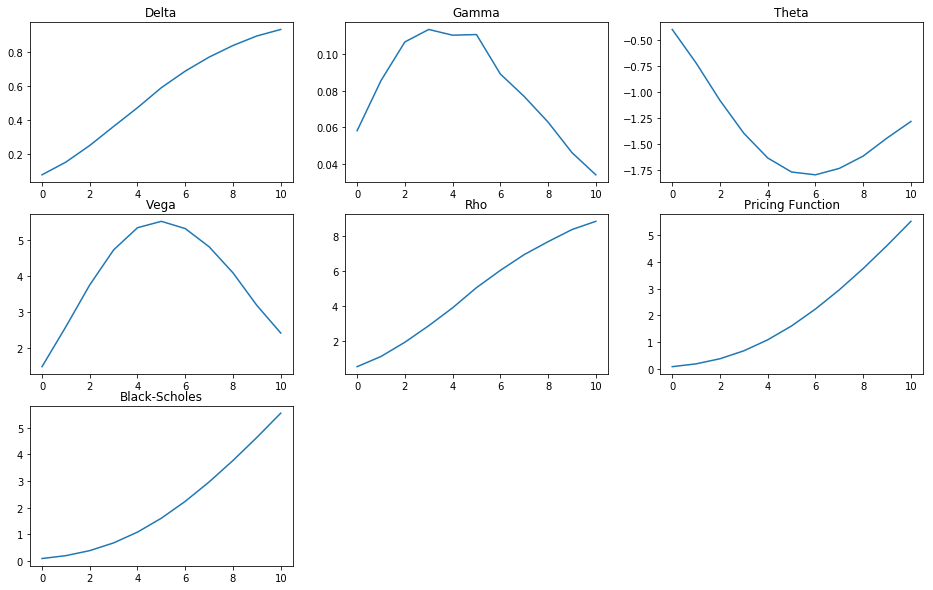

In [24]:
#c
S0 = np.array([i for i in range(15,26)])
T = 0.5; X = 20; r = 0.04; sigma = 0.25
d1 = (np.log(S0/X) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

Delta = [None]*11; Gamma = [None]*11; Theta = [None]*11; Vega = [None]*11; 
Rho = [None]*11; ECp = [None]*11; ECn = [None]*11; EC = [None]*11;
C1 = [None]*11; C2 = [None]*11
for i in range(11):
    C1[i] = Euro_Call(S0[i],T,X,r,sigma)
    C2[i] = B_S(S0[i],T,X,r,sigma)
    Delta[i] = (Euro_Call(S0[i]+0.1,T,X,r,sigma) - Euro_Call(S0[i],T,X,r,sigma))/0.1
    ECp[i] = Euro_Call(S0[i]+1,T,X,r,sigma)
    ECn[i] = Euro_Call(S0[i]-1,T,X,r,sigma)
    Gamma[i] = (ECp[i] + ECn[i] - 2*np.array(C1[i]))/(1**2)
    Theta[i] = (Euro_Call(S0[i],T,X,r,sigma)-Euro_Call(S0[i],T+0.01,X,r,sigma))/0.01
    Vega[i] = (Euro_Call(S0[i],T,X,r,sigma+0.01)-Euro_Call(S0[i],T,X,r,sigma))/0.01
    Rho[i] = (Euro_Call(S0[i],T,X,r+0.001,sigma)-Euro_Call(S0[i],T,X,r,sigma))/0.001
plt.figure(1, figsize=(16, 10))
plt.subplot(331)
ax1 = plt.plot(Delta)
plt.title("Delta")
plt.subplot(332)
ax2 = plt.plot(Gamma)
plt.title("Gamma")
plt.subplot(333)
ax3 = plt.plot(Theta)
plt.title("Theta")
plt.subplot(334)
ax4 = plt.plot(Vega)
plt.title("Vega")
plt.subplot(335)
ax5 = plt.plot(Rho)
plt.title("Rho")
plt.subplot(336)
ax6 = plt.plot(C1)
plt.title("Pricing Function")
plt.subplot(337)
ax7 = plt.plot(C2)
plt.title("Black-Scholes")

In [29]:
print("Prices of options with underlyling stocks from $15 to $25 computed by pricing function are:")
print(np.round(C1,4))

Prices of options with underlyling stocks from $15 to $25 computed by pricing function are:
[0.0738 0.1796 0.3711 0.6693 1.0813 1.6037 2.2371 2.9596 3.7591 4.6215
 5.53  ]


In [30]:
print("Prices of options with underlyling stocks from $15 to $25 computed by Black-Scholes are:")
print(np.round(C2,4))

Prices of options with underlyling stocks from $15 to $25 computed by Black-Scholes are:
[0.0858 0.1943 0.3828 0.6732 1.0787 1.6016 2.2345 2.963  3.7695 4.6362
 5.5471]


In [32]:
print("Deltas of options with underlyling stocks from $15 to $25 are:")
print(np.round(Delta,4))

Deltas of options with underlyling stocks from $15 to $25 are:
[0.0762 0.151  0.2487 0.3605 0.4706 0.5883 0.6856 0.7679 0.8361 0.8922
 0.9304]


In [33]:
print("Gamma of options with underlyling stocks from $15 to $25 are:")
print(np.round(Gamma,4))

Gamma of options with underlyling stocks from $15 to $25 are:
[0.0581 0.0856 0.1068 0.1137 0.1105 0.1109 0.0893 0.0769 0.0629 0.0462
 0.034 ]


In [34]:
print("Theta of options with underlyling stocks from $15 to $25 are:")
print(np.round(Theta,4))

Theta of options with underlyling stocks from $15 to $25 are:
[-0.4    -0.7225 -1.0832 -1.3994 -1.6372 -1.7727 -1.7995 -1.7377 -1.619
 -1.445  -1.2856]


In [35]:
print("Vega of options with underlyling stocks from $15 to $25 are:")
print(np.round(Vega,4))

Vega of options with underlyling stocks from $15 to $25 are:
[1.4969 2.6006 3.755  4.7215 5.3338 5.5103 5.3101 4.8077 4.0878 3.189
 2.4262]


In [36]:
print("Rho of options with underlyling stocks from $15 to $25 are:")
print(np.round(Rho,4))

Rho of options with underlyling stocks from $15 to $25 are:
[0.4998 1.0852 1.9036 2.8523 3.8806 5.0375 6.0316 6.9364 7.679  8.3736
 8.8472]


# Problem 4

In [41]:
#4----------------------------------
def f_corr2W(n,x,var,rho):
    covM = np.array([[1,rho],[rho,1]])
    L = np.linalg.cholesky(covM)
    N1 = np.random.normal(0,1,n)
    N2 = np.random.normal(0,1,n)
    dWt1 = np.sqrt(var[0])*L[0,0]*N1
    dWt2 = np.sqrt(var[1])*(L[1,0]*N1 + L[1,1]*N2)
    r = [dWt1,dWt2]
    return r

def f_max(x):
    if x > 0:
        r = x
    else:
        r = 0
    return r

def f_C(n,x,T,V0,S0,K,rho,scheme = None):
    dt = T/n
    C = [None]*1000
    var = [dt,dt]
    for j in range(1000):
        W = f_corr2W(n,x,var,rho)
        Wt1 = W[0]
        Wt2 = W[1]
        v = [None]*(n+1)
        v[0] = V0
        s = [None]*(n+1)
        s[0] = S0
        if scheme == "Reflection":
            for i in range(n):
                s[i+1] = s[i] + r*s[i]*dt + np.sqrt(np.absolute(v[i]))*s[i]*Wt1[i]
                v[i+1] = np.absolute(v[i]) \
                        + a*(b-np.absolute(v[i]))*dt \
                        + sigma*np.sqrt(np.absolute(v[i]))*Wt2[i]
        elif scheme == "Partial":
            for i in range(n):
                s[i+1] = s[i] + r*s[i]*dt + np.sqrt(f_max(v[i]))*s[i]*Wt1[i]
                v[i+1] = v[i] + a*(b-v[i])*dt \
                        + sigma*np.sqrt(f_max(v[i]))*Wt2[i]
        elif scheme == "Full":
            for i in range(n):
                s[i+1] = s[i] + r*s[i]*dt + np.sqrt(f_max(v[i]))*s[i]*Wt1[i]
                v[i+1] = v[i] + a*(b-f_max(v[i]))*dt \
                        + sigma*np.sqrt(f_max(v[i]))*Wt2[i]
        else:
            for i in range(n):
                s[i+1] = s[i] + r*s[i]*dt + np.sqrt(v[i])*s[i]*Wt1[i]
                v[i+1] = v[i] + a*(b-v[i])*dt \
                        + sigma*np.sqrt(v[i])*Wt2[i]
                if v[i+1] < 0:
                    print("Warning: Encounter negative Vt value!")
                    print("         Use other scheme!")
                    return np.nan
        if (s[n] - K) > 0:
            C[j] = (s[n] - K)*np.exp(-r*T)
        else:
            C[j] = 0
    return C

**Aboves are functions that can compute the price of an European Call Option with different methods (Reflection,Partial Truncation, Full Truncation)**

In [56]:
rho = -0.6; r = 0.03; S0 = 48; V0 = 0.05; sigma = 0.42
a = 5.8; b = 0.0625; T = 0.5; K = 50
n = 1000; x = 500
C_ref = f_C(n,x,T,V0,S0,K,rho,scheme = "Reflection")
C_part = f_C(n,x,T,V0,S0,K,rho,scheme = "Partial")
C_full = f_C(n,x,T,V0,S0,K,rho,scheme = "Full")
print(np.round([np.mean(C_ref),np.mean(C_part),np.mean(C_full)],3))

[2.584 2.635 2.762]


Since I used different seeds to compute the prices each time, the prices generated by each method are slightly different. <br>
Even though prices are different by using different methods, they are very similar compared to each other. This is because with T = 0.5, all dVt could be positive and therefore, each method will generate similar price for the option.

|Method          |Option Price|
|--------------------|------------|
|Reflection       |2.584     |
|Partial Truncation  |2.635     |
|Full Truncation    |2.762     |

# Problem 5

**Following is the Halton Sequence generation function:**

In [47]:
def f_HaltonS(base,n):
    seq = np.zeros(n)
    bits = 1+math.ceil(np.log(n)/np.log(base))
    bs = np.array([i+1 for i in range(bits)])
    b = 1/(base**bs)
    d = np.zeros(bits)
    for i in range(n):
        j = 0; ok = 0
        while ok == 0:
            d[j] = d[j]+1
            if d[j] < base:
                ok = 1
            else:
                d[j] = 0; j = j+1
        seq[i] = np.dot(d,b)
    return  seq

**(a) generate 100 2-dimensional vectors of Uniform [0,1] $\times$ [0,1]**

In [48]:
#5--------------------------------
#a
X = f_unif(100,1)
Y = f_unif(100,10)
unif2d = [X,Y]

**(b) generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 7**

In [49]:
x_h_2 = f_HaltonS(2,100)
y_h_7 = f_HaltonS(7,100)
halton27 = [x_h_2,y_h_7]

**(c) generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 4**

In [50]:
y_h_4 = f_HaltonS(4,100)
halton24 = [x_h_2,y_h_4]

**(d) Draw all 3 sequences generated above:**

Text(0.5, 1.0, 'vectors of Halton bases 2 and 4')

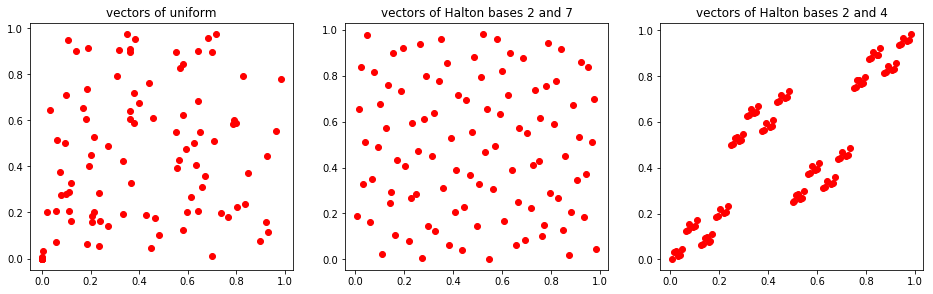

In [52]:
plt.figure(2, figsize=(16, 10))
plt.subplot(231)
ax10 = plt.plot(unif2d[0],unif2d[1],"ro")
plt.title("vectors of uniform")
plt.subplot(232)
ax11 = plt.plot(halton27[0],halton27[1],"ro")
plt.title("vectors of Halton bases 2 and 7")
plt.subplot(233)
ax12 = plt.plot(halton24[0],halton24[1],"ro")
plt.title("vectors of Halton bases 2 and 4")

**Comment:** <br>
The first plot looks like there are some clusters of points, which makes the distribution of the points not very uniform. <br>
The second plot looks much more better than the first plot and its distributions looks uniform. <br>
The last plot looks terrible and points are barely uniformly distributed. The reason is that the Halton sequences generated are based on bases 2 and 4 where 4 is a non-prime number. This problem makes the points in the third plot cluster togehter since 2 and 4 are both multiples of 2. <br> <br>

**(e) compute the following integral by using Halton sequences:**

$$\int_{0}^{1} \int_{0}^{1} e^{-xy}(sin6\pi x+cos^{\frac{1}{3}}2\pi y)dxdy$$

In [54]:
N = 10000
x2 = f_HaltonS(2,N)
y4 = f_HaltonS(4,N)
y7 = f_HaltonS(7,N)
x5 = f_HaltonS(5,N)
integral24 = [None]*N
integral27 = [None]*N
integral57 = [None]*N
for i in range(N):
    integral24[i] = np.exp(-x2*y4)*(np.sin(6*np.pi*x2) \
                  + np.sign(np.cos(2*np.pi*y4)) \
                  * np.absolute(np.cos(2*np.pi*y4))**(1/3))
    integral27[i] = np.exp(-x2*y7)*(np.sin(6*np.pi*x2) \
                  + np.sign(np.cos(2*np.pi*y7)) \
                  * np.absolute(np.cos(2*np.pi*y7))**(1/3))
    integral57[i] = np.exp(-x5*y7)*(np.sin(6*np.pi*x5) \
                  + np.sign(np.cos(2*np.pi*y7)) \
                  * np.absolute(np.cos(2*np.pi*y7))**(1/3))
I24 = np.mean(integral24)
I27 = np.mean(integral27)
I57 = np.mean(integral57)
print(np.round([I24,I27,I57],5))

[-0.00488  0.02611  0.02616]


|Base|Integral value|
|----|-----|
|(2,4)|-0.00488|
|(2,7)|0.02611|
|(5,7)|0.02616|